# RQ4 : How can trends in the prevalence of main topics within positive and negative sentiments be used to forecast changes in customer feedback and anticipate future service priorities?

### This section is contain the following analysis :
 
<b> Topic Forcasting with LSTM and Prophet Models (Week 8)
    
    1. Model Training
    2. Model Evaluation
    3. Topics Forcasting

# Week 8 Topic Forcasting with LSTM and Prophet Models

# 1. Model Training

## 1.1 Training with LSTM (Long Short-Term Memory)

In [11]:
import pandas as pd

# Load the dataset
file_path = 'final_mapped_topics_results.csv'  
df = pd.read_csv(file_path)

# Convert 'published_date' to datetime and handle timezone information
df['published_date'] = pd.to_datetime(df['published_date'], utc=True, errors='coerce')

# Group data by Date, Topic, and Sentiment
daily_topic_sentiment_counts = df.groupby(
    [df['published_date'].dt.date, 'mapped_topic', 'sentiment']
).size().reset_index(name='Count')

# Calculate total counts of all topics for each day and sentiment
daily_total_counts = daily_topic_sentiment_counts.groupby(
    ['published_date', 'sentiment']
)['Count'].sum().reset_index(name='Total_Count')

# Merge total counts back to the topic-level data
daily_topic_sentiment_counts = pd.merge(
    daily_topic_sentiment_counts,
    daily_total_counts,
    on=['published_date', 'sentiment']
)

# Calculate percentage for each topic per day per sentiment
daily_topic_sentiment_counts['Percentage'] = (
    daily_topic_sentiment_counts['Count'] / daily_topic_sentiment_counts['Total_Count'] * 100
)

# Sort the data for better readability
daily_topic_sentiment_counts_sorted = daily_topic_sentiment_counts.sort_values(
    by=['published_date', 'mapped_topic', 'sentiment']
)

# Save the results to a new CSV file for further analysis
output_file_path = 'daily_topic_sentiment_percentages.csv'  # Replace with your desired output path
daily_topic_sentiment_counts_sorted.to_csv(output_file_path, index=False)

# Display the resulting DataFrame for verification
print(daily_topic_sentiment_counts_sorted.head())


  published_date             mapped_topic sentiment  Count  Total_Count  \
0     2018-08-06            General Topic  positive      1           15   
5     2018-08-06  Meal service efficiency  negative      1            5   
1     2018-08-06  Meal service efficiency  positive      5           15   
6     2018-08-06             Seat comfort  negative      1            5   
2     2018-08-06             Seat comfort  positive      1           15   

   Percentage  
0    6.666667  
5   20.000000  
1   33.333333  
6   20.000000  
2    6.666667  


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


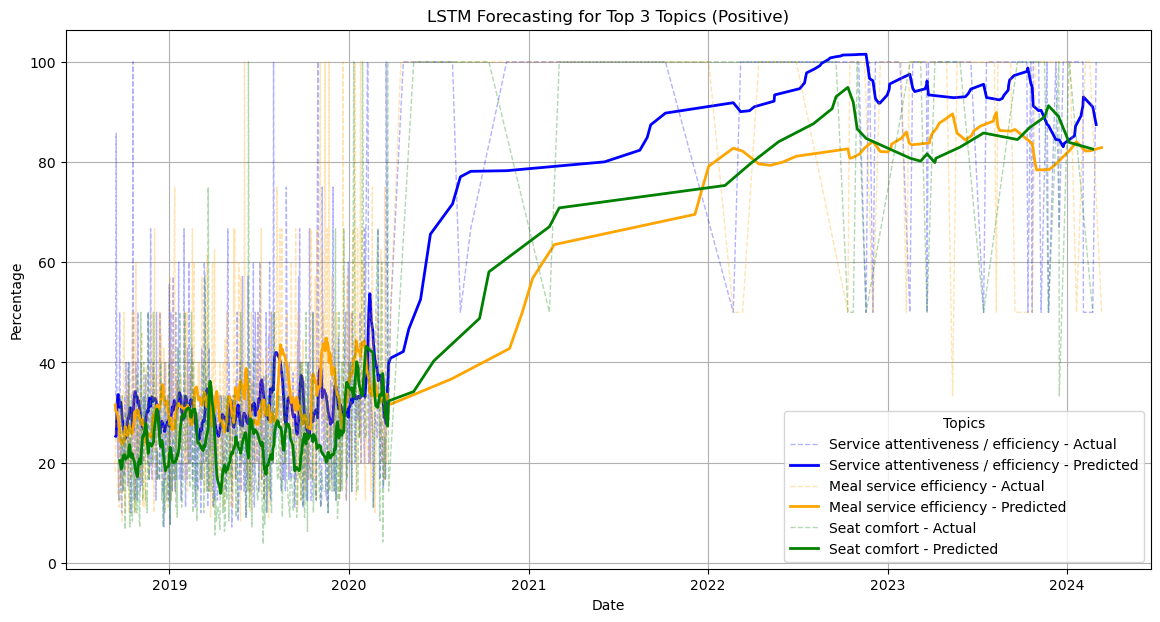

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


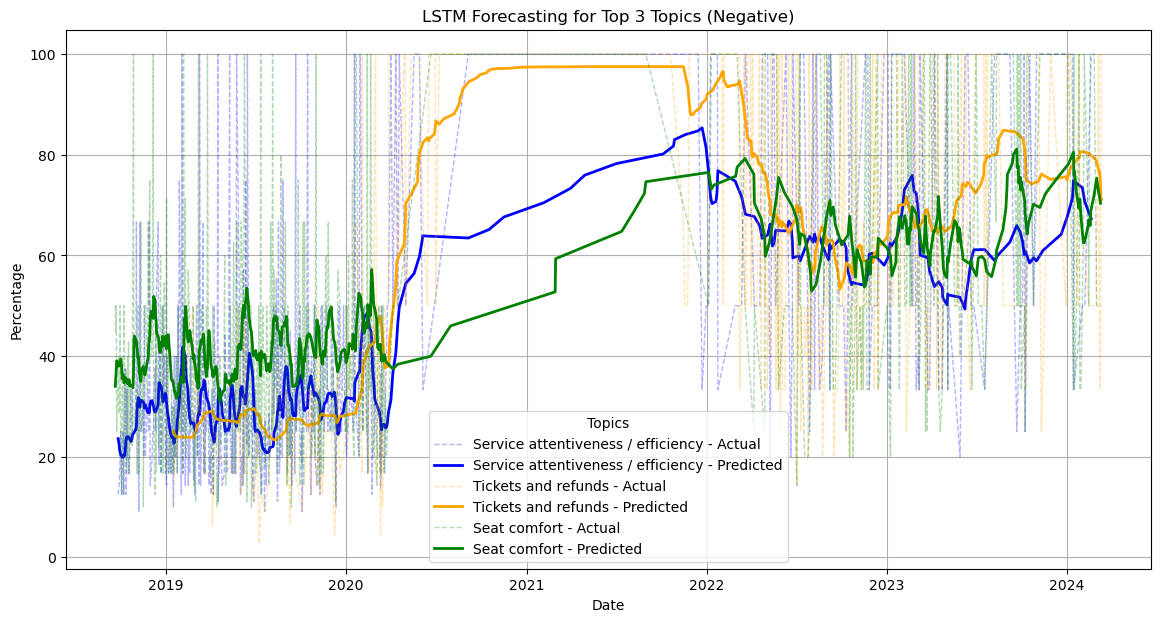

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the preprocessed data
file_path = 'daily_topic_sentiment_percentages.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Function to prepare data and train LSTM for each topic
def train_lstm_for_topic(topic, sentiment, sequence_length=30):
    # Filter data for a specific topic and sentiment
    filtered_df = df[(df['mapped_topic'] == topic) & (df['sentiment'] == sentiment)]

    # Check if there is enough data for training
    if len(filtered_df) <= sequence_length:
        print(f"Not enough data for Topic: {topic}, Sentiment: {sentiment}")
        return None, None, None

    # Ensure data is sorted by date
    filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
    filtered_df = filtered_df.sort_values('published_date')

    # Extract percentage values
    percentage_values = filtered_df['Percentage'].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    percentage_scaled = scaler.fit_transform(percentage_values)

    # Create sequences
    X, y = [], []
    for i in range(len(percentage_scaled) - sequence_length):
        X.append(percentage_scaled[i:i+sequence_length])
        y.append(percentage_scaled[i+sequence_length])
    X, y = np.array(X), np.array(y)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X, y, epochs=20, batch_size=32, verbose=0)  

    # Predict using the model
    predictions = model.predict(X)

    # Reverse normalization for predictions and actual values
    predicted_values = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y.reshape(-1, 1))

    return filtered_df.iloc[sequence_length:], actual_values, predicted_values

# Define top 3 topics for each sentiment
top_positive_topics = [
    'Service attentiveness / efficiency',
    'Meal service efficiency',
    'Seat comfort'
]
top_negative_topics = [
    'Service attentiveness / efficiency',
    'Tickets and refunds',
    'Seat comfort'
]

# Function to plot results for multiple topics
def plot_results(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    for idx, topic in enumerate(topics):
        # Train and forecast for each topic
        dates, actual_values, predicted_values = train_lstm_for_topic(topic, sentiment)

        if dates is None:  # Skip topics with insufficient data
            continue

        # Plot actual values
        plt.plot(dates['published_date'], actual_values, linestyle='--', label=f'{topic} - Actual',
                 color=colors[idx], alpha=0.3, linewidth=1)

        # Plot predicted values
        plt.plot(dates['published_date'], predicted_values, label=f'{topic} - Predicted',
                 color=colors[idx], alpha=1, linewidth=2)

    # Add labels and legend
    plt.title(f'LSTM Forecasting for Top 3 Topics ({sentiment.capitalize()})')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics')
    plt.grid()
    plt.show()

# Define colors for each topic
colors = ['blue', 'orange', 'green'] 

# Plot for positive sentiment
plot_results(top_positive_topics, 'positive', colors)

# Plot for negative sentiment
plot_results(top_negative_topics, 'negative', colors)


In [31]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [32]:
from prophet import Prophet

## 1.2 Training with Prophet

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
05:18:31 - cmdstanpy - INFO - Chain [1] start processing
05:18:31 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['pub

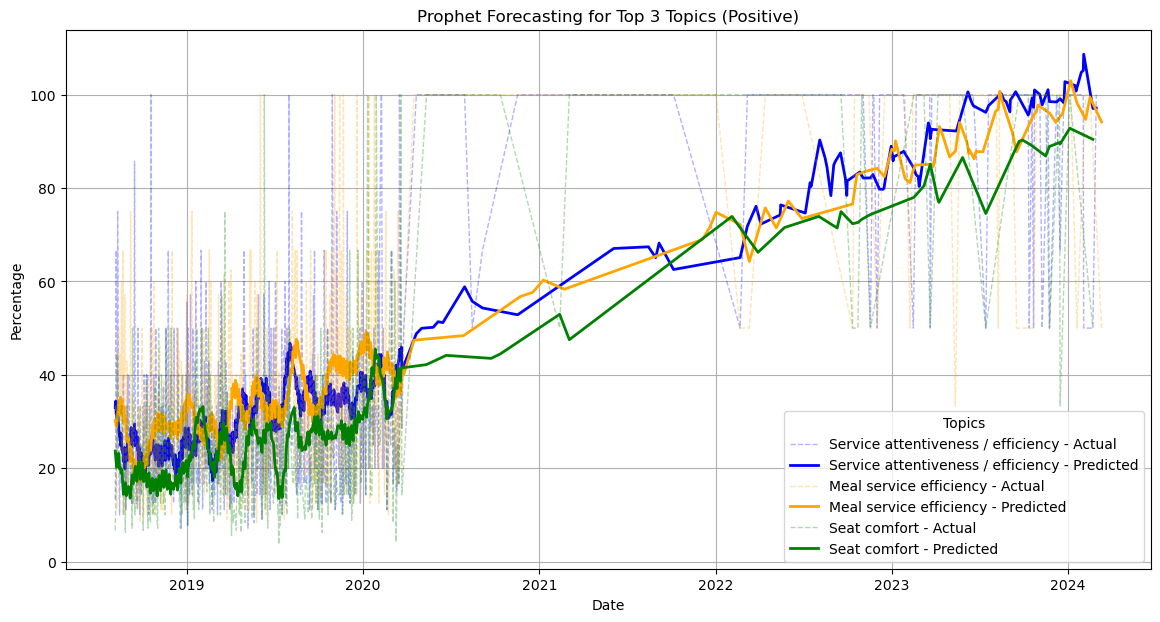

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
05:18:32 - cmdstanpy - INFO - Chain [1] start processing
05:18:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['pub

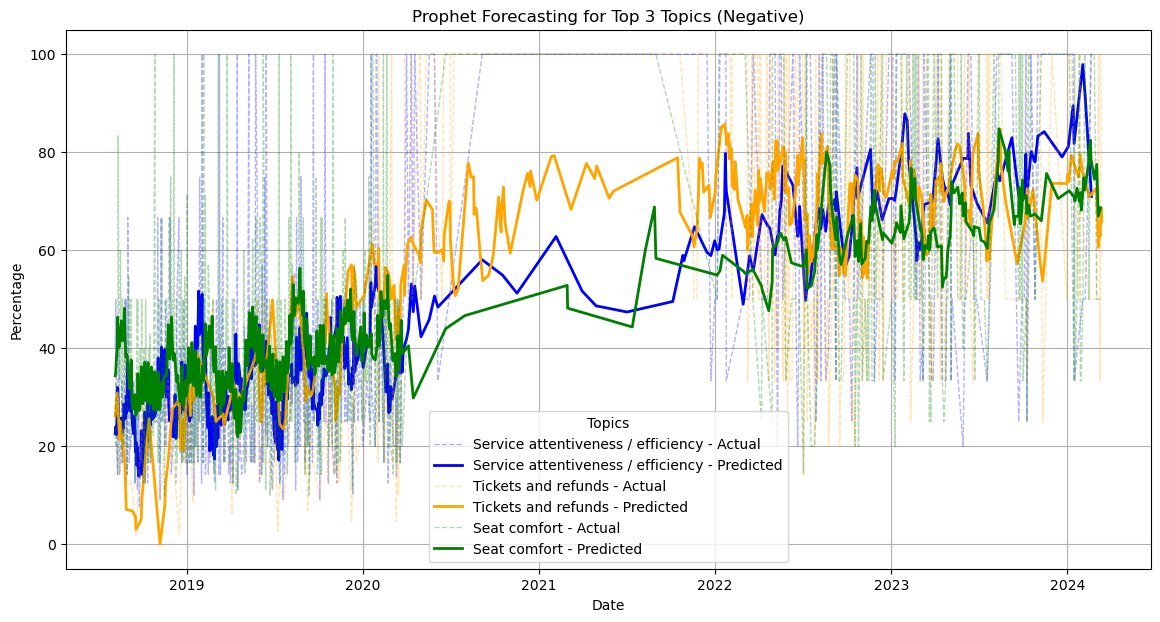

In [38]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the preprocessed data
file_path = 'daily_topic_sentiment_percentages.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Function to prepare data and train Prophet for each topic
def train_prophet_for_topic(topic, sentiment):
    # Filter data for a specific topic and sentiment
    filtered_df = df[(df['mapped_topic'] == topic) & (df['sentiment'] == sentiment)]

    # Check if there is enough data for training
    if len(filtered_df) <= 10:  # Ensure sufficient data
        print(f"Not enough data for Topic: {topic}, Sentiment: {sentiment}")
        return None, None, None

    # Prepare data for Prophet
    filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
    filtered_df = filtered_df.sort_values('published_date')
    prophet_df = filtered_df[['published_date', 'Percentage']].rename(
        columns={'published_date': 'ds', 'Percentage': 'y'}
    )

    # Train the Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Create a dataframe for future predictions
    future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
    forecast = model.predict(future)

    # Match predictions with actual values
    actual_values = prophet_df['y']
    predicted_values = forecast.loc[:len(actual_values)-1, 'yhat']  # Match with historical data

    return prophet_df, actual_values, predicted_values

# Define top 3 topics for each sentiment
top_positive_topics = [
    'Service attentiveness / efficiency',
    'Meal service efficiency',
    'Seat comfort'
]
top_negative_topics = [
    'Service attentiveness / efficiency',
    'Tickets and refunds',
    'Seat comfort'
]

# Function to plot results for multiple topics
def plot_results(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    for idx, topic in enumerate(topics):
        # Train and forecast for each topic
        data, actual_values, predicted_values = train_prophet_for_topic(topic, sentiment)

        if data is None:  # Skip topics with insufficient data
            continue

        # Plot actual values
        plt.plot(data['ds'], actual_values, linestyle='--', label=f'{topic} - Actual',
                 color=colors[idx], alpha=0.3, linewidth=1)

        # Plot predicted values
        plt.plot(data['ds'], predicted_values, label=f'{topic} - Predicted',
                 color=colors[idx], alpha=1, linewidth=2)

    # Add labels and legend
    plt.title(f'Prophet Forecasting for Top 3 Topics ({sentiment.capitalize()})')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics')
    plt.grid()
    plt.show()

# Define colors for each topic
colors = ['blue', 'orange', 'green'] 

# Plot for positive sentiment
plot_results(top_positive_topics, 'positive', colors)

# Plot for negative sentiment
plot_results(top_negative_topics, 'negative', colors)


# 2. Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Function to calculate RMSE, MAE, and MAPE for each topic
def evaluate_metrics(topics, sentiment, method, train_model_function):
    results = []
    
    for idx, topic in enumerate(topics):
        print(f"Evaluating {method} on topic: {topic}")
        
        # Train and forecast using the provided model function
        dates, actual_values, predicted_values = train_model_function(topic, sentiment)
        
        if dates is None:  # Skip topics with insufficient data
            print(f"Not enough data for topic: {topic}")
            continue

        # Evaluate performance
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        mae = mean_absolute_error(actual_values, predicted_values)
        mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100  # MAPE formula
        
        print(f"{method} - Topic: {topic}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
        
        # Store results
        results.append({'Topic': topic, 'Method': method, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})
    
    return results

# Define topics and sentiments
top_positive_topics = [
    'Service attentiveness / efficiency',
    'Meal service efficiency',
    'Seat comfort'
]
top_negative_topics = [
    'Service attentiveness / efficiency',
    'Tickets and refunds',
    'Seat comfort'
]

# Evaluate Prophet
prophet_results = evaluate_metrics(
    topics=top_positive_topics,
    sentiment='positive',
    method='Prophet',
    train_model_function=train_prophet_for_topic  # Replace with Prophet training function
)

# Evaluate LSTM
lstm_results = evaluate_metrics(
    topics=top_positive_topics,
    sentiment='positive',
    method='LSTM',
    train_model_function=train_lstm_for_topic  # Replace with LSTM training function
)

# Combine results into a single DataFrame for comparison
all_results = pd.DataFrame(prophet_results + lstm_results)

# Display results
print(all_results)

# Optionally, save to CSV for reporting
all_results.to_csv("metrics_comparison_results_with_mape.csv", index=False)


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
05:27:12 - cmdstanpy - INFO - Chain [1] start processing
05:27:12 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Prophet on topic: Service attentiveness / efficiency
Prophet - Topic: Service attentiveness / efficiency, RMSE: 17.80, MAE: 13.30, MAPE: 92.22%
Evaluating Prophet on topic: Meal service efficiency


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
05:27:12 - cmdstanpy - INFO - Chain [1] start processing
05:27:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/1930893978.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['pub

Prophet - Topic: Meal service efficiency, RMSE: 17.58, MAE: 13.62, MAPE: 110.46%
Evaluating Prophet on topic: Seat comfort
Prophet - Topic: Seat comfort, RMSE: 16.40, MAE: 12.04, MAPE: 112.31%
Evaluating LSTM on topic: Service attentiveness / efficiency


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM - Topic: Service attentiveness / efficiency, RMSE: 17.78, MAE: 13.40, MAPE: 44.91%
Evaluating LSTM on topic: Meal service efficiency


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM - Topic: Meal service efficiency, RMSE: 18.24, MAE: 13.95, MAPE: 48.35%
Evaluating LSTM on topic: Seat comfort


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM - Topic: Seat comfort, RMSE: 17.11, MAE: 12.41, MAPE: 57.15%
                                Topic   Method       RMSE        MAE  \
0  Service attentiveness / efficiency  Prophet  17.802199  13.301968   
1             Meal service efficiency  Prophet  17.584590  13.615539   
2                        Seat comfort  Prophet  16.400460  12.042048   
3  Service attentiveness / efficiency     LSTM  17.777412  13.397283   
4             Meal service efficiency     LSTM  18.243458  13.948451   
5                        Seat comfort     LSTM  17.111853  12.406824   

         MAPE  
0   92.224321  
1  110.459989  
2  112.309399  
3   44.907338  
4   48.349545  
5   57.150538  


# 3. Top 3 Topics Forcasting 

## 3.1 Recall LSTM Result 

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


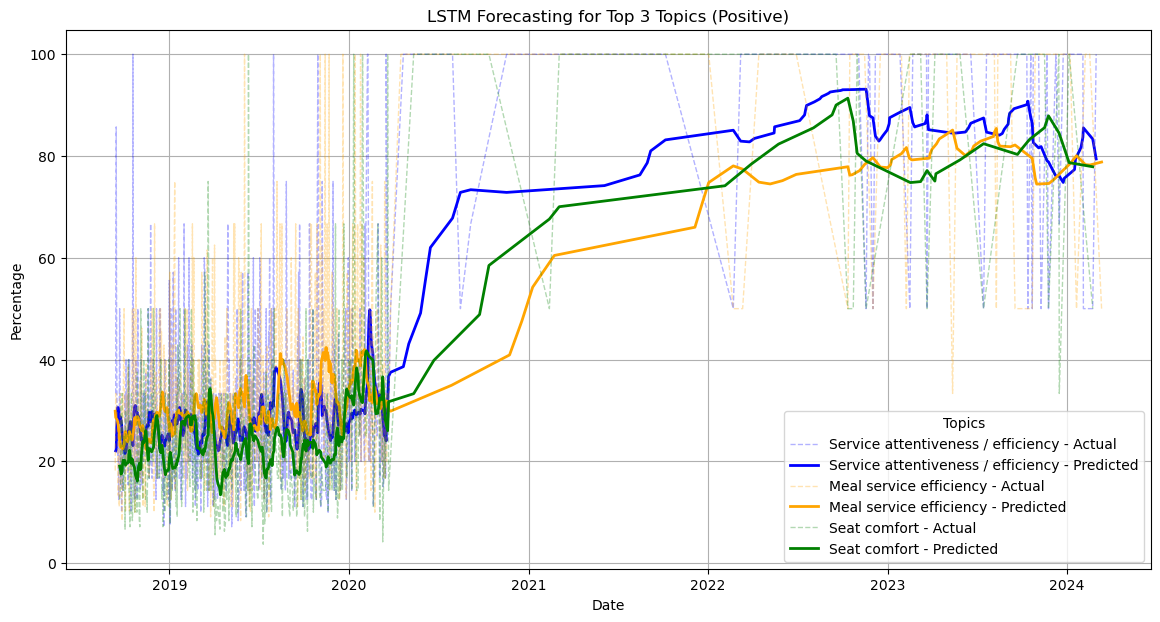

/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2457533280.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


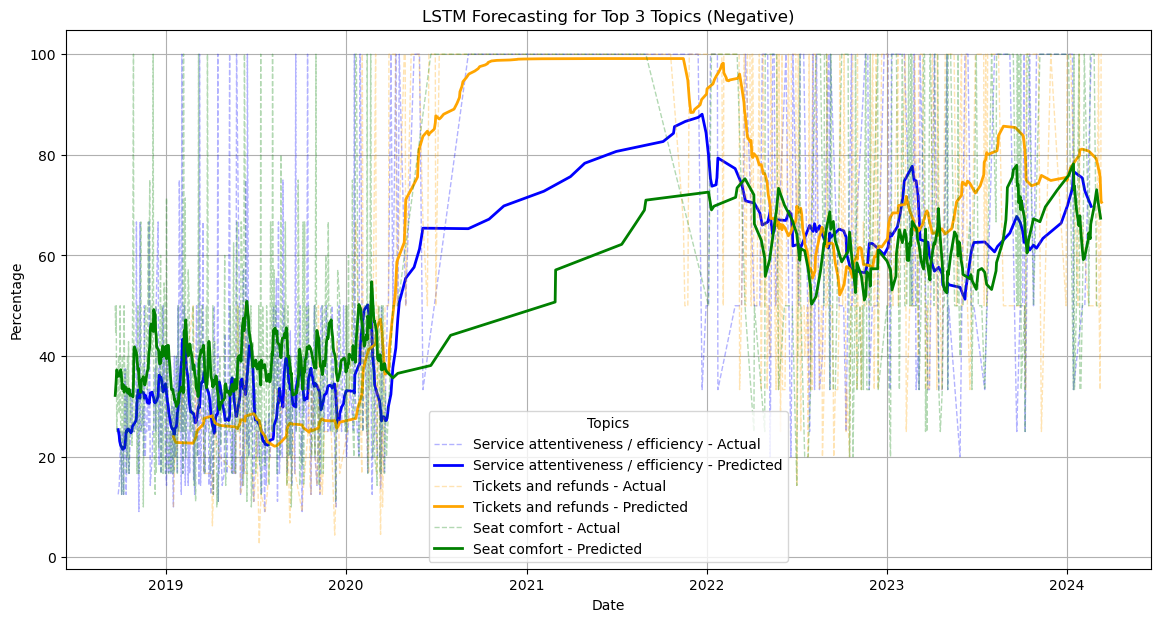

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the preprocessed data
file_path = 'daily_topic_sentiment_percentages.csv' 
df = pd.read_csv(file_path)

# Function to prepare data and train LSTM for each topic
def train_lstm_for_topic(topic, sentiment, sequence_length=30):
    # Filter data for a specific topic and sentiment
    filtered_df = df[(df['mapped_topic'] == topic) & (df['sentiment'] == sentiment)]

    # Check if there is enough data for training
    if len(filtered_df) <= sequence_length:
        print(f"Not enough data for Topic: {topic}, Sentiment: {sentiment}")
        return None, None, None

    # Ensure data is sorted by date
    filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
    filtered_df = filtered_df.sort_values('published_date')

    # Extract percentage values
    percentage_values = filtered_df['Percentage'].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    percentage_scaled = scaler.fit_transform(percentage_values)

    # Create sequences
    X, y = [], []
    for i in range(len(percentage_scaled) - sequence_length):
        X.append(percentage_scaled[i:i+sequence_length])
        y.append(percentage_scaled[i+sequence_length])
    X, y = np.array(X), np.array(y)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X, y, epochs=20, batch_size=32, verbose=0)  # Suppress detailed output

    # Predict using the model
    predictions = model.predict(X)

    # Reverse normalization for predictions and actual values
    predicted_values = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y.reshape(-1, 1))

    return filtered_df.iloc[sequence_length:], actual_values, predicted_values

# Define top 3 topics for each sentiment
top_positive_topics = [
    'Service attentiveness / efficiency',
    'Meal service efficiency',
    'Seat comfort'
]
top_negative_topics = [
    'Service attentiveness / efficiency',
    'Tickets and refunds',
    'Seat comfort'
]

# Function to plot results for multiple topics
def plot_results(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    for idx, topic in enumerate(topics):
        # Train and forecast for each topic
        dates, actual_values, predicted_values = train_lstm_for_topic(topic, sentiment)

        if dates is None:  # Skip topics with insufficient data
            continue

        # Plot actual values
        plt.plot(dates['published_date'], actual_values, linestyle='--', label=f'{topic} - Actual',
                 color=colors[idx], alpha=0.3, linewidth=1)

        # Plot predicted values
        plt.plot(dates['published_date'], predicted_values, label=f'{topic} - Predicted',
                 color=colors[idx], alpha=1, linewidth=2)

    # Add labels and legend
    plt.title(f'LSTM Forecasting for Top 3 Topics ({sentiment.capitalize()})')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics')
    plt.grid()
    plt.show()

# Define colors for each topic
colors = ['blue', 'orange', 'green'] 

# Plot for positive sentiment
plot_results(top_positive_topics, 'positive', colors)

# Plot for negative sentiment
plot_results(top_negative_topics, 'negative', colors)


## 3.2 Topic Forcasting 

Extending forecast for Positive Sentiments...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


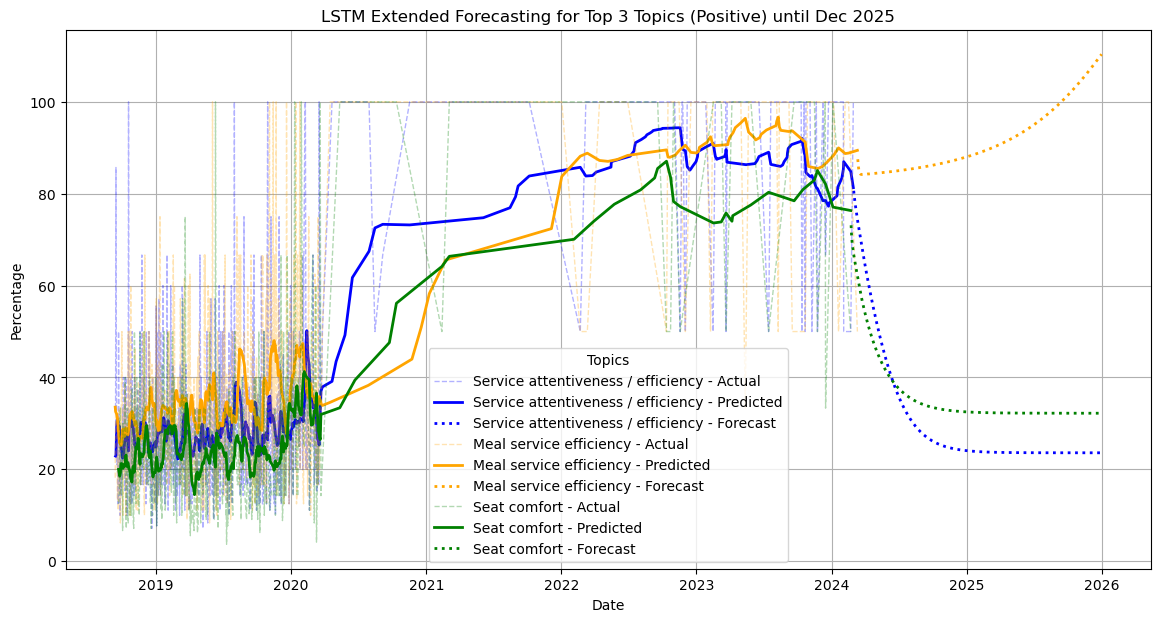

Extending forecast for Negative Sentiments...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


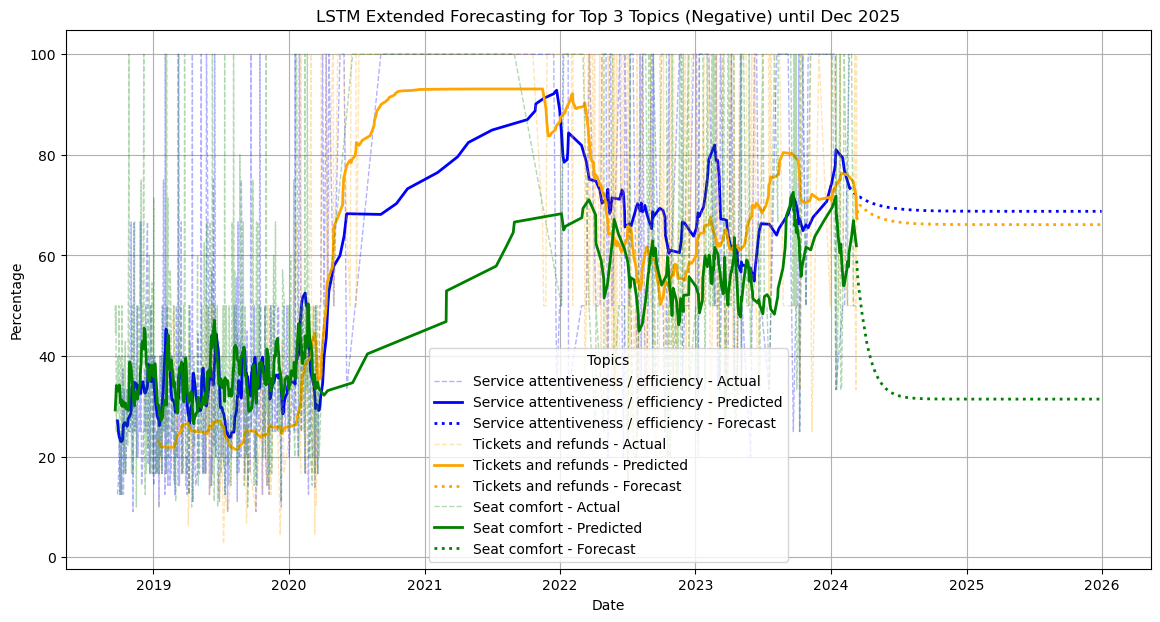

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the preprocessed data
file_path = 'daily_topic_sentiment_percentages.csv' 
df = pd.read_csv(file_path)

# Function to prepare data and train LSTM for each topic
def train_lstm_for_topic(topic, sentiment, sequence_length=30):
    # Filter data for a specific topic and sentiment
    filtered_df = df[(df['mapped_topic'] == topic) & (df['sentiment'] == sentiment)]

    # Check if there is enough data for training
    if len(filtered_df) <= sequence_length:
        print(f"Not enough data for Topic: {topic}, Sentiment: {sentiment}")
        return None, None, None

    # Ensure data is sorted by date
    filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
    filtered_df = filtered_df.sort_values('published_date')

    # Extract percentage values
    percentage_values = filtered_df['Percentage'].values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    percentage_scaled = scaler.fit_transform(percentage_values)

    # Create sequences
    X, y = [], []
    for i in range(len(percentage_scaled) - sequence_length):
        X.append(percentage_scaled[i:i+sequence_length])
        y.append(percentage_scaled[i+sequence_length])
    X, y = np.array(X), np.array(y)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X, y, epochs=20, batch_size=32, verbose=0)

    # Predict using the model
    predictions = model.predict(X)

    # Reverse normalization for predictions and actual values
    predicted_values = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y.reshape(-1, 1))

    return filtered_df.iloc[sequence_length:], actual_values, predicted_values, model, scaler

# Function to forecast future percentages using the trained model
def forecast_future(model, scaler, last_sequence, start_date, forecast_horizon):
    # Prepare future dates
    future_dates = [start_date + timedelta(days=i) for i in range(1, forecast_horizon + 1)]
    
    # Forecast future values
    predictions = []
    for _ in range(forecast_horizon):
        # Reshape the last sequence for prediction
        last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], 1)
        pred = model.predict(last_sequence_reshaped, verbose=0)
        predictions.append(pred[0, 0])
        # Update the last sequence with the new prediction
        last_sequence = np.append(last_sequence[1:], pred, axis=0)

    # Reverse normalization for predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    
    return future_dates, predictions

# Function to extend forecast and plot results
def extend_forecast_plot(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    for idx, topic in enumerate(topics):
        # Train and get the last sequence, model, and scaler
        dates, actual_values, predicted_values, model, scaler = train_lstm_for_topic(topic, sentiment)
        
        if dates is None:  # Skip topics with insufficient data
            continue
        
        # Normalize the last sequence
        percentage_values = dates['Percentage'].values.reshape(-1, 1)
        percentage_scaled = scaler.transform(percentage_values)
        
        # Use the last 30 days as the last sequence
        if len(percentage_scaled) >= 30:
            last_sequence = percentage_scaled[-30:]
        else:
            print(f"Not enough data to create a sequence for topic: {topic}, sentiment: {sentiment}")
            continue
        
        # Set start date and forecast horizon
        start_date = dates['published_date'].iloc[-1]
        forecast_horizon = (pd.Timestamp('2025-12-31') - start_date).days
        
        # Forecast future values
        future_dates, future_predictions = forecast_future(model, scaler, last_sequence, start_date, forecast_horizon)
        
        # Plot historical actual and predicted values
        plt.plot(dates['published_date'], actual_values, linestyle='--', label=f'{topic} - Actual', color=colors[idx], alpha=0.3, linewidth=1)
        plt.plot(dates['published_date'], predicted_values, label=f'{topic} - Predicted', color=colors[idx], alpha=1, linewidth=2)
        
        # Plot future predictions
        plt.plot(future_dates, future_predictions, label=f'{topic} - Forecast', color=colors[idx], linewidth=2)

    # Customize the plot
    plt.title(f'LSTM Extended Forecasting for Top 3 Topics ({sentiment.capitalize()}) until Dec 2025')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics')
    plt.grid()
    plt.show()

# Define top 3 topics for each sentiment
top_positive_topics = [
    'Service attentiveness / efficiency',
    'Meal service efficiency',
    'Seat comfort'
]
top_negative_topics = [
    'Service attentiveness / efficiency',
    'Tickets and refunds',
    'Seat comfort'
]

# Define colors for each topic
colors = ['blue', 'orange', 'green']

# Extend forecast for positive sentiment
print("Extending forecast for Positive Sentiments...")
extend_forecast_plot(top_positive_topics, 'positive', colors)

# Extend forecast for negative sentiment
print("Extending forecast for Negative Sentiments...")
extend_forecast_plot(top_negative_topics, 'negative', colors)


### Revised Visualization 

Extending forecast for Positive Sentiments with Phases...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


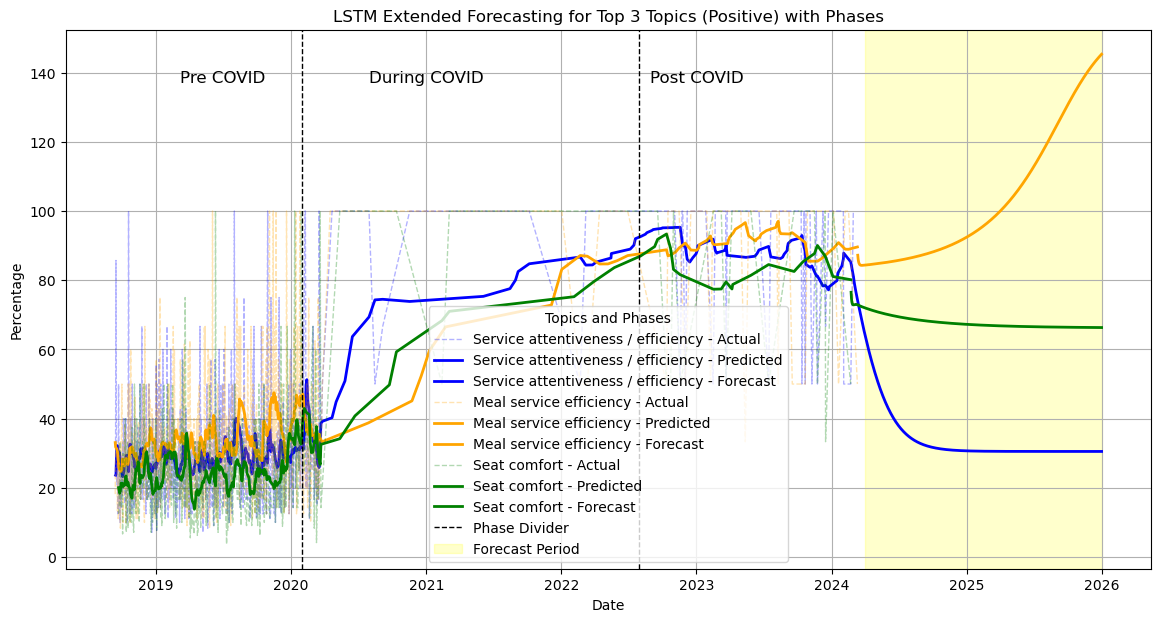

Extending forecast for Negative Sentiments with Phases...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


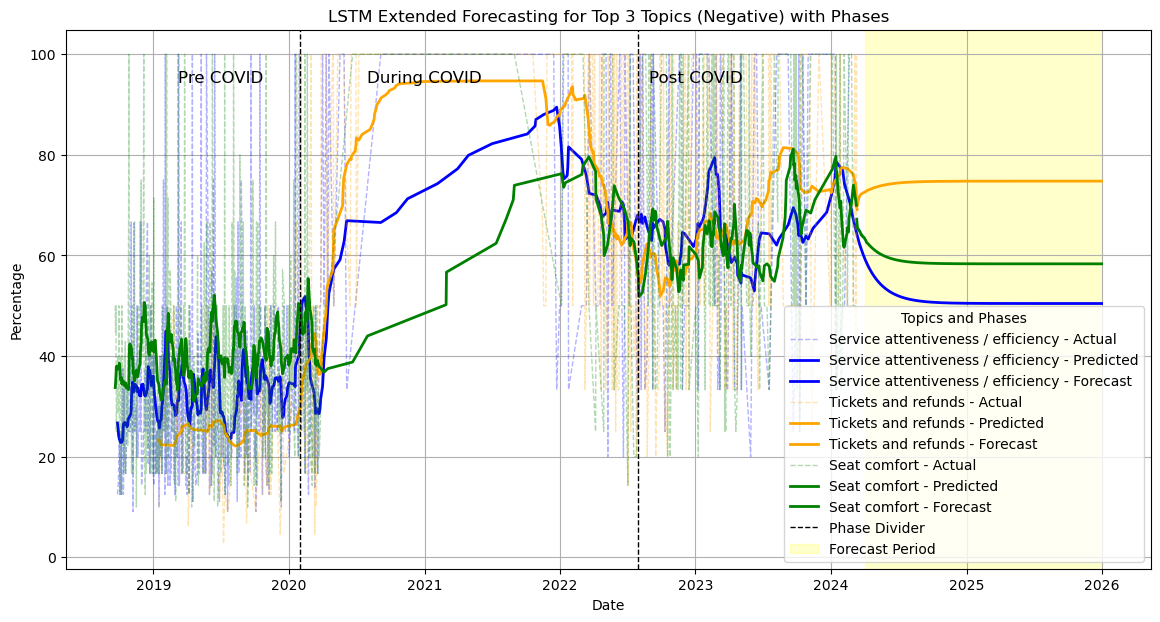

In [63]:
import matplotlib.patches as patches

# Function to extend forecast and plot results with phases and forecast highlight
def extend_forecast_plot_with_phases(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    ax = plt.gca()  # Get current axes

    for idx, topic in enumerate(topics):
        # Train and get the last sequence, model, and scaler
        dates, actual_values, predicted_values, model, scaler = train_lstm_for_topic(topic, sentiment)
        
        if dates is None:  # Skip topics with insufficient data
            continue
        
        # Normalize the last sequence
        percentage_values = dates['Percentage'].values.reshape(-1, 1)
        percentage_scaled = scaler.transform(percentage_values)
        
        # Use the last 30 days as the last sequence
        if len(percentage_scaled) >= 30:
            last_sequence = percentage_scaled[-30:]
        else:
            print(f"Not enough data to create a sequence for topic: {topic}, sentiment: {sentiment}")
            continue
        
        # Set start date and forecast horizon
        start_date = dates['published_date'].iloc[-1]
        forecast_horizon = (pd.Timestamp('2025-12-31') - start_date).days
        
        # Forecast future values
        future_dates, future_predictions = forecast_future(model, scaler, last_sequence, start_date, forecast_horizon)
        
        # Plot historical actual and predicted values
        plt.plot(dates['published_date'], actual_values, linestyle='--', label=f'{topic} - Actual', color=colors[idx], alpha=0.3, linewidth=1)
        plt.plot(dates['published_date'], predicted_values, label=f'{topic} - Predicted', color=colors[idx], alpha=1, linewidth=2)
        
        # Plot future predictions
        plt.plot(future_dates, future_predictions, label=f'{topic} - Forecast', color=colors[idx], linewidth=2)

    # Add phase labels and vertical lines
    pre_covid_end = pd.Timestamp('2020-01-31')
    covid_end = pd.Timestamp('2022-07-31')

    plt.axvline(pre_covid_end, color='black', linestyle='--', linewidth=1, label="Phase Divider")
    plt.axvline(covid_end, color='black', linestyle='--', linewidth=1)

    # Add phase text labels
    ax.text(pd.Timestamp('2019-07-01'), ax.get_ylim()[1] * 0.9, 'Pre COVID', fontsize=12, ha='center')
    ax.text(pd.Timestamp('2021-01-01'), ax.get_ylim()[1] * 0.9, 'During COVID', fontsize=12, ha='center')
    ax.text(pd.Timestamp('2023-01-01'), ax.get_ylim()[1] * 0.9, 'Post COVID', fontsize=12, ha='center')

    # Highlight forecast period with a light yellow background
    forecast_start = pd.Timestamp('2024-04-01')
    forecast_end = pd.Timestamp('2025-12-31')
    ax.add_patch(patches.Rectangle(
        (forecast_start, ax.get_ylim()[0]),  # Bottom-left corner
        forecast_end - forecast_start,      # Width (datetime subtraction)
        ax.get_ylim()[1] - ax.get_ylim()[0],  # Height
        color='yellow', alpha=0.2, label="Forecast Period"
    ))

    # Customize the plot
    plt.title(f'LSTM Extended Forecasting for Top 3 Topics ({sentiment.capitalize()}) with Phases')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics and Phases')
    plt.grid()
    plt.show()

# Extend forecast for positive sentiment with phases
print("Extending forecast for Positive Sentiments with Phases...")
extend_forecast_plot_with_phases(top_positive_topics, 'positive', colors)

# Extend forecast for negative sentiment with phases
print("Extending forecast for Negative Sentiments with Phases...")
extend_forecast_plot_with_phases(top_negative_topics, 'negative', colors)


Extending forecast for Positive Sentiments with Phases...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


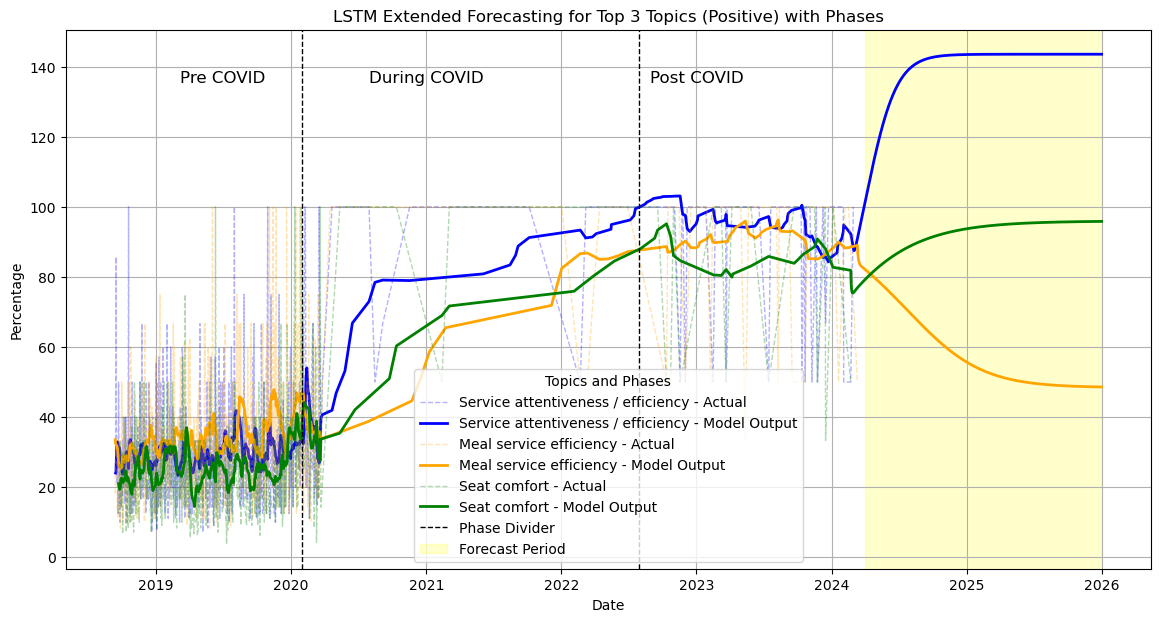

Extending forecast for Negative Sentiments with Phases...


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/var/folders/cn/35wfbzzj6p1cr4nk4t63tbs40000gn/T/ipykernel_66555/2005437727.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['published_date'] = pd.to_datetime(filtered_df['published_date'])
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


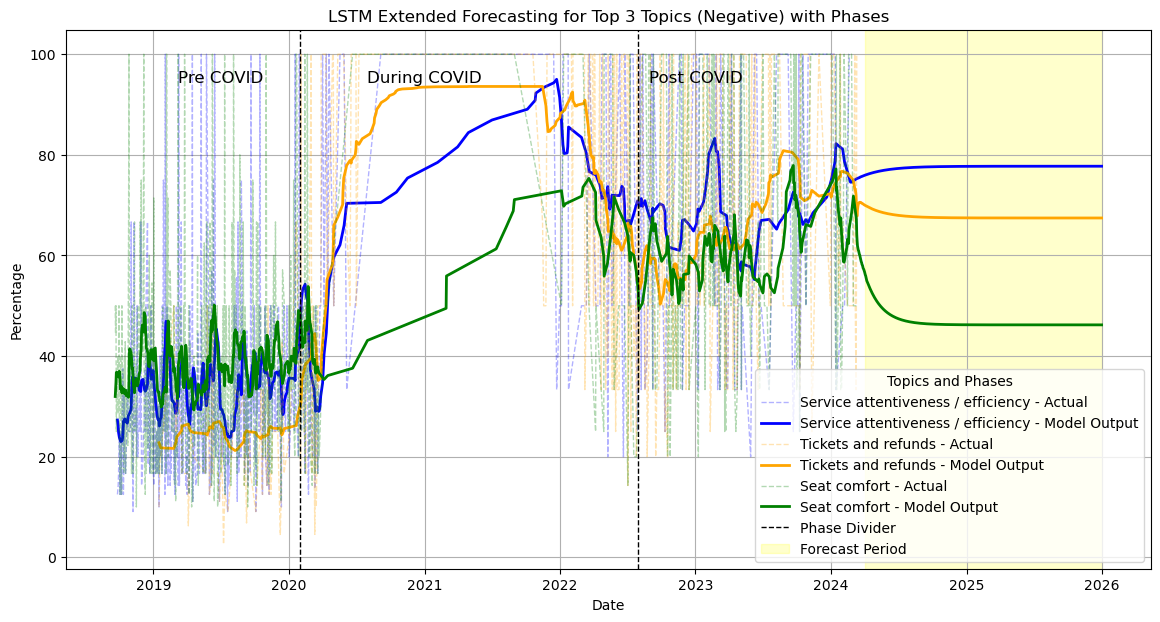

In [64]:
# Function to extend forecast and plot results with phases and forecast highlight
def extend_forecast_plot_with_phases(topics, sentiment, colors):
    plt.figure(figsize=(14, 7))
    ax = plt.gca()  # Get current axes

    for idx, topic in enumerate(topics):
        # Train the LSTM model and retrieve data
        dates, actual_values, predicted_values, model, scaler = train_lstm_for_topic(topic, sentiment)
        
        if dates is None:  # Skip topics with insufficient data
            continue
        
        # Normalize the last sequence
        percentage_values = dates['Percentage'].values.reshape(-1, 1)
        percentage_scaled = scaler.transform(percentage_values)
        
        # Use the last 30 days as the last sequence
        if len(percentage_scaled) >= 30:
            last_sequence = percentage_scaled[-30:]
        else:
            print(f"Not enough data to create a sequence for topic: {topic}, sentiment: {sentiment}")
            continue
        
        # Set start date and forecast horizon
        start_date = dates['published_date'].iloc[-1]
        forecast_horizon = (pd.Timestamp('2025-12-31') - start_date).days
        if forecast_horizon < 0:  # Skip if forecast horizon is invalid
            print(f"Forecast horizon invalid for topic: {topic}, sentiment: {sentiment}")
            continue
        
        # Forecast future values
        future_dates, future_predictions = forecast_future(model, scaler, last_sequence, start_date, forecast_horizon)
        
        # Plot historical actual values
        plt.plot(dates['published_date'], actual_values, linestyle='--', label=f'{topic} - Actual', color=colors[idx], alpha=0.3, linewidth=1)
        
        # Plot predicted and forecasted values as one line
        all_predicted_dates = list(dates['published_date']) + future_dates
        all_predicted_values = list(predicted_values.flatten()) + list(future_predictions)
        plt.plot(all_predicted_dates, all_predicted_values, label=f'{topic} - Model Output', color=colors[idx], linewidth=2)

    # Add phase dividers
    pre_covid_end = pd.Timestamp('2020-01-31')
    covid_end = pd.Timestamp('2022-07-31')

    plt.axvline(pre_covid_end, color='black', linestyle='--', linewidth=1, label="Phase Divider")
    plt.axvline(covid_end, color='black', linestyle='--', linewidth=1)

    # Add phase labels
    ax.text(pd.Timestamp('2019-07-01'), ax.get_ylim()[1] * 0.9, 'Pre COVID', fontsize=12, ha='center')
    ax.text(pd.Timestamp('2021-01-01'), ax.get_ylim()[1] * 0.9, 'During COVID', fontsize=12, ha='center')
    ax.text(pd.Timestamp('2023-01-01'), ax.get_ylim()[1] * 0.9, 'Post COVID', fontsize=12, ha='center')

    # Highlight forecast period with light yellow
    forecast_start = pd.Timestamp('2024-04-01')
    forecast_end = pd.Timestamp('2025-12-31')
    ax.add_patch(patches.Rectangle(
        (forecast_start, ax.get_ylim()[0]),  # Bottom-left corner
        forecast_end - forecast_start,      # Width (datetime subtraction)
        ax.get_ylim()[1] - ax.get_ylim()[0],  # Height
        color='yellow', alpha=0.2, label="Forecast Period"
    ))

    # Customize the plot
    plt.title(f'LSTM Extended Forecasting for Top 3 Topics ({sentiment.capitalize()}) with Phases')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend(loc='best', title='Topics and Phases')
    plt.grid()
    plt.show()

# Extend forecast for positive sentiment
print("Extending forecast for Positive Sentiments with Phases...")
extend_forecast_plot_with_phases(top_positive_topics, 'positive', colors)

# Extend forecast for negative sentiment
print("Extending forecast for Negative Sentiments with Phases...")
extend_forecast_plot_with_phases(top_negative_topics, 'negative', colors)
